# Convolutional Neural Networks

In this exercise we focus on basic operations for convolutional layers and on a simple neural network implementation with convolutional layers.

## Operations

In [1]:
import numpy as np
np.random.seed(42)

# Consider a 2d - window of size 12x12
window = np.random.randn(12, 12)

### Strides

In [2]:
# Implement the sliding window method used in convolutional layers
# Dont do the convolution itself, just let the window slide

# For that, use a stride of 2
# Use a kernel of size 3x3 and slide over the "window" variable defined in the previous block
# When sliding the kernel over the window with the stride of 2, set always the maximum number of that area to every single entry
# E. g. if the window you are currently slicing over looks like this:
#  3 4 5
#  5 2 6
#  1 7 2
# then it should be transformed into
#  7 7 7
#  7 7 7
#  7 7 7

# Make sure that you update the result always after one complete sliding over the complete window
# so that for every calculation you use the original values

stride = 2
kernel_size = 3

def sliding_stride_set_max(window, kernel_size, stride=1):
    # Your code here
    result = window.copy()
    rows, cols = window.shape
    for i in range(0, rows - kernel_size + 1, stride):
        for j in range(0, cols - kernel_size + 1, stride):
            region = window[i:i+kernel_size, j:j+kernel_size]
            max_val = np.max(region)
            result[i:i+kernel_size, j:j+kernel_size] = max_val
    return result

max_slide_window = sliding_stride_set_max(window=window, kernel_size=kernel_size, stride=stride)

print(max_slide_window)

[[ 0.64768854  0.64768854  1.52302986  1.52302986  1.57921282  1.57921282
   1.85227818  1.85227818  1.46564877  1.46564877  1.46564877 -0.46572975]
 [ 0.64768854  0.64768854  1.52302986  1.52302986  1.57921282  1.57921282
   1.85227818  1.85227818  1.46564877  1.46564877  1.46564877 -1.42474819]
 [ 0.34361829  0.34361829  0.73846658  0.73846658  1.03099952  1.03099952
   1.85227818  1.85227818  0.82254491  0.82254491  0.82254491 -1.22084365]
 [ 0.34361829  0.34361829  0.73846658  0.73846658  1.03099952  1.03099952
   1.85227818  1.85227818  0.82254491  0.82254491  0.82254491  1.05712223]
 [ 1.56464366  1.56464366  0.8219025   0.8219025   1.35624003  1.35624003
   1.03099952  1.03099952  1.47789404  1.47789404  1.47789404  0.97554513]
 [ 1.56464366  1.56464366  0.8219025   0.8219025   1.35624003  1.35624003
   1.03099952  1.03099952  1.47789404  1.47789404  1.47789404  1.53803657]
 [ 1.56464366  1.56464366  0.91540212  0.91540212  0.51326743  0.51326743
   0.96864499  0.96864499  1.886

### Padding

In [3]:
import numpy as np
# Implement a padding of zeros to the following numpy array
to_pad = np.random.randn(6, 6)
print(to_pad)

# The zero padding should pad the array on every side with size 2
# So that they output array of the 6x6 array is of shape 10x10


# Your code here
padding = np.pad(to_pad, pad_width=2, mode='constant', constant_values=0)
print(padding)


[[ 0.25988279  0.78182287 -1.23695071 -1.32045661  0.52194157  0.29698467]
 [ 0.25049285  0.34644821 -0.68002472  0.2322537   0.29307247 -0.71435142]
 [ 1.86577451  0.47383292 -1.1913035   0.65655361 -0.97468167  0.7870846 ]
 [ 1.15859558 -0.82068232  0.96337613  0.41278093  0.82206016  1.89679298]
 [-0.24538812 -0.75373616 -0.88951443 -0.81581028 -0.07710171  0.34115197]
 [ 0.2766908   0.82718325  0.01300189  1.45353408 -0.26465683  2.72016917]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.25988279  0.78182287 -1.23695071 -1.32045661
   0.52194157  0.29698467  0.          0.        ]
 [ 0.          0.          0.25049285  0.34644821 -0.68002472  0.2322537
   0.29307247 -0.71435142  0.          0.        ]
 [ 0.          0.          1.86577451  0.47383292 -1.1913035   0.6

### Pooling

In [4]:
import numpy as np
# Implement max pooling with the following array (window)
to_pool = np.random.randn(6, 6)

# Implement the max pooling
# Use a stride of 2 and kernel size of 2x2

stride = 2
kernel_size = 2

def max_pooling(window, kernel_size, stride=1):
    assert kernel_size >= stride
    assert len(window.shape) == 2
    assert window.shape[0] % kernel_size == 0
    assert window.shape[1] % kernel_size == 0


    # Your code here
    rows, cols = window.shape
    out_rows = (rows - kernel_size) // stride + 1
    out_cols = (cols - kernel_size) // stride + 1
    result = np.zeros((out_rows, out_cols))
    for i in range(out_rows):
        for j in range(out_cols):
            region = window[i*stride:i*stride+kernel_size, j*stride:j*stride+kernel_size]
            result[i, j] = np.max(region)
    return result

pooling = max_pooling(window=to_pool, kernel_size=kernel_size, stride=stride)
print(pooling)


[[0.62566735 0.48247242 0.85639879]
 [0.21409374 0.56078453 1.08305124]
 [1.13556564 0.95400176 3.85273149]]


## First CNN PyTorch implementation

In [5]:
# 1) Implement a small neural network with convolutional layers
# 2) Implement a small neural network with linear layers (as in previous practicals)
    # make sure that the networks from 1) and 2) have around the same amount of parameters, to make them comparable to each other
# 3) Compare the accuracy with the networks from previous practicals, can you improve the accuracy with conv layers?

### MNIST dataset

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.83MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 24.8MB/s]


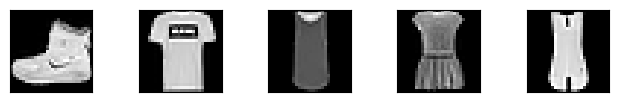

In [6]:
# Use the FashionMNIST dataset

import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)
import torchvision
import torchvision.transforms as transforms
import tqdm
import matplotlib.pyplot as plt


def load_fashion_mnist_data(root_path='./data', batch_size=4):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))]
    )

    train_dataset = torchvision.datasets.FashionMNIST(root=root_path, train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

    test_dataset = torchvision.datasets.FashionMNIST(root=root_path, train=False, download=True, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, test_loader, train_dataset, test_dataset


def plot_fashsion_mnist_images():
    _, _, train_dataset, _ = load_fashion_mnist_data()

    # get first x items
    no = 5
    images = [train_dataset.__getitem__(i)[0].permute(1,2,0) for i in range(0, no)]

    start_pos = 0
    for i in range(no):
        plt.subplot(1, no, i+1)
        plt.tight_layout()
        plt.imshow(images[i], cmap='gray', interpolation='none')
        plt.xticks([])
        plt.yticks([])
    plt.show()

plot_fashsion_mnist_images()

### Training and evaluation methods

In [7]:
# the operate method calls the train and eval method
# so you only have to call the operate method and pass
# the parameters to train and evaluate your model in one line
import torch
from typing import Callable
from torch.optim import Optimizer
from torch.utils.data import DataLoader
import torch.nn as nn

def train_model(
    model: nn.Module, loss_fn: Callable, optimizer: Optimizer,
    train_data_loader: DataLoader, epoch: int, batch_size: int = 4, epochs: int = 10, device: torch.device = 'cpu'
):
    # turn training mode on
    model.train()

    running_loss = []
    running_accuracy = []
    for imgs, targets in tqdm.tqdm(train_data_loader, desc=f'Training iteration {epoch + 1}'):
        imgs, targets = imgs.to(device=device), targets.to(device=device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(imgs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss.append(loss.item())

        # Calculate the Accuracy (how many of all samples are correctly classified?)
        max_outputs = torch.max(outputs, dim=1).indices
        accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
        running_accuracy.append(accuracy)

    return torch.mean(torch.as_tensor(running_loss)), torch.mean(torch.as_tensor(running_accuracy)), running_loss, running_accuracy



def eval_model(
    model: nn.Module, loss_fn: Callable, val_data_loader: DataLoader, epoch: int, batch_size: int = 4, device: torch.device = 'cpu'
):
    # turn evaluation mode on
    model.eval()

    with torch.no_grad():
        running_loss = []
        running_accuracy = []
        for imgs, targets in tqdm.tqdm(val_data_loader, desc=f'Evaluation iteration {epoch + 1}'):
            imgs, targets = imgs.to(device=device), targets.to(device=device)

            # forward + backward + optimize
            outputs = model(imgs)
            loss = loss_fn(outputs, targets)

            # print statistics
            running_loss.append(loss.item())

            # Calculate the Accuracy (how many of all samples are correctly classified?)
            max_outputs = torch.max(outputs, dim=1).indices
            accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
            running_accuracy.append(accuracy)

    return torch.mean(torch.as_tensor(running_loss)), torch.mean(torch.as_tensor(running_accuracy)), running_loss, running_accuracy


def operate(model: nn.Module, loss_fn: Callable, optimizer: Optimizer,
    train_data_loader: DataLoader, test_data_loader: DataLoader, batch_size: int = 4, epochs: int = 10
):
    t_losses, t_accs, e_losses, e_accs = [], [], [], []
    t_iter_losses, t_iter_accs, e_iter_losses, e_iter_accs = [], [], [], []
    for epoch in range(epochs):
        t_loss, t_acc, t_i_losses, t_i_accs = train_model(model=model, loss_fn=loss_fn, optimizer=optimizer, train_data_loader=train_data_loader, epoch=epoch, batch_size=batch_size, epochs=epochs)
        t_losses.append(t_loss)
        t_accs.append(t_acc)
        t_iter_losses.extend(t_i_losses)
        t_iter_accs.extend(t_i_accs)

        e_loss, e_acc, e_i_losses, e_i_accs = eval_model(model=model, loss_fn=loss_fn, val_data_loader=test_data_loader, epoch=epoch, batch_size=batch_size)
        e_losses.append(e_loss)
        e_accs.append(e_acc)
        e_iter_losses.extend(e_i_losses)
        e_iter_accs.extend(e_i_accs)

        print(f'Training epoch {epoch + 1} finished with loss: {t_loss} and accuracy {t_acc}')
        print(f'Eval epoch {epoch + 1} finished with loss: {e_loss} and accuracy {e_acc}')

    return t_losses, t_accs, t_iter_losses, t_iter_accs, e_losses, e_accs, e_iter_losses, e_iter_accs

### Method to count the parameters of a model

In [8]:
# pass your model to this function to get the trainable parameters (weights) of your model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

### Some hyperparameters

In [9]:
# Init the datasets
batch_size = 4
train_data_loader, test_data_loader, _, _ = load_fashion_mnist_data(batch_size=batch_size)

# set epochs
epochs = 5

## Linear and Conv model

In [10]:
import torch.nn as nn

### Use the implementation of the linear layer model
### and update the layers or extend the layers
### to learn the mnist data
class LinearLayerModel(nn.Module):
    def __init__(self, batch_norm=False) -> None:
        super().__init__()

        if batch_norm:
            self.model = nn.Sequential(
                nn.Linear(784, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.BatchNorm1d(64),
                nn.ReLU(),
                nn.Linear(64, 10)
            )
        else:
            self.model = nn.Sequential(
                nn.Linear(784, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 10)
            )

    def forward(self, imgs):
        imgs = imgs.reshape(imgs.shape[0], -1)

        return self.model(imgs)



# Implement your convolutional layer model
class ConvLayerModel(nn.Module):
    def __init__(self, batch_norm=False) -> None:
        super().__init__()

        if batch_norm:
            self.model = nn.Sequential(
                nn.Conv2d(1, 16, kernel_size=3, padding=1),
                nn.BatchNorm2d(16),
                nn.ReLU(),
                nn.MaxPool2d(2, 2),
                nn.Conv2d(16, 32, kernel_size=3, padding=1),
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.MaxPool2d(2, 2),
                nn.Flatten(),
                nn.Linear(32 * 7 * 7, 10)
            )
        else:
            self.model = nn.Sequential(
                nn.Conv2d(1, 16, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(2, 2),
                nn.Conv2d(16, 32, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(2, 2),
                nn.Flatten(),
                nn.Linear(32 * 7 * 7, 10)
            )

    def forward(self, imgs):
        return self.model(imgs)

## Train the convolutional model

In [11]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [12]:
from torch.optim import Adam
import torch.nn.functional as F

conv_model = ConvLayerModel()
print(f'Convolutional model has: {count_parameters(conv_model)} parameters to optimize.')
optimizer = Adam(conv_model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

conv_t_losses, conv_t_accs, conv_t_iter_losses, conv_t_iter_accs, conv_e_losses, conv_e_accs, conv_e_iter_losses, conv_e_iter_accs = operate(
    model=conv_model, loss_fn=loss_fn, optimizer=optimizer,
    train_data_loader=train_data_loader, test_data_loader=test_data_loader,
    batch_size=batch_size, epochs=epochs
)


Convolutional model has: 20490 parameters to optimize.


Evaluation iteration 1: 100%|██████████| 2500/2500 [00:09<00:00, 258.28it/s]


Training epoch 1 finished with loss: 0.38687267899513245 and accuracy 0.8620666861534119
Eval epoch 1 finished with loss: 0.33378374576568604 and accuracy 0.8795999884605408


Evaluation iteration 2: 100%|██████████| 2500/2500 [00:09<00:00, 265.24it/s]


Training epoch 2 finished with loss: 0.2747623026371002 and accuracy 0.9006166458129883
Eval epoch 2 finished with loss: 0.28313323855400085 and accuracy 0.9003000259399414


Evaluation iteration 3: 100%|██████████| 2500/2500 [00:08<00:00, 285.26it/s]


Training epoch 3 finished with loss: 0.24317306280136108 and accuracy 0.9129999876022339
Eval epoch 3 finished with loss: 0.26688137650489807 and accuracy 0.9049000144004822


Evaluation iteration 4: 100%|██████████| 2500/2500 [00:09<00:00, 265.28it/s]


Training epoch 4 finished with loss: 0.22335976362228394 and accuracy 0.9200666546821594
Eval epoch 4 finished with loss: 0.2753036916255951 and accuracy 0.9054999947547913


Evaluation iteration 5: 100%|██████████| 2500/2500 [00:09<00:00, 253.38it/s]

Training epoch 5 finished with loss: 0.21006321907043457 and accuracy 0.9244166612625122
Eval epoch 5 finished with loss: 0.28485992550849915 and accuracy 0.9028000235557556


## Train the linear layer model

In [13]:
linear_layer_model = LinearLayerModel()
print(f'Linear layer model has: {count_parameters(linear_layer_model)} parameters to optimize.')
optimizer = Adam(linear_layer_model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

ll_t_losses, ll_t_accs, ll_t_iter_losses, ll_t_iter_accs, ll_e_losses, ll_e_accs, ll_e_iter_losses, ll_e_iter_accs = operate(
    model=linear_layer_model, loss_fn=loss_fn, optimizer=optimizer,
    train_data_loader=train_data_loader, test_data_loader=test_data_loader,
    batch_size=batch_size, epochs=epochs
)

Linear layer model has: 109386 parameters to optimize.


Evaluation iteration 1: 100%|██████████| 2500/2500 [00:06<00:00, 391.64it/s]


Training epoch 1 finished with loss: 0.49887707829475403 and accuracy 0.817216694355011
Eval epoch 1 finished with loss: 0.4481119215488434 and accuracy 0.8345999717712402


Evaluation iteration 2: 100%|██████████| 2500/2500 [00:06<00:00, 367.62it/s]


Training epoch 2 finished with loss: 0.3948977291584015 and accuracy 0.8552833199501038
Eval epoch 2 finished with loss: 0.4489592909812927 and accuracy 0.8418999910354614


Evaluation iteration 3: 100%|██████████| 2500/2500 [00:07<00:00, 349.94it/s]


Training epoch 3 finished with loss: 0.3676472008228302 and accuracy 0.866599977016449
Eval epoch 3 finished with loss: 0.4248550832271576 and accuracy 0.8475000262260437


Evaluation iteration 4: 100%|██████████| 2500/2500 [00:07<00:00, 340.25it/s]


Training epoch 4 finished with loss: 0.3489585816860199 and accuracy 0.8720999956130981
Eval epoch 4 finished with loss: 0.3772527873516083 and accuracy 0.8669999837875366


Evaluation iteration 5: 100%|██████████| 2500/2500 [00:06<00:00, 370.57it/s]

Training epoch 5 finished with loss: 0.34198322892189026 and accuracy 0.8764500021934509
Eval epoch 5 finished with loss: 0.39837145805358887 and accuracy 0.8626999855041504


## Train the convolutional network with batch normalization

In [14]:
bn_conv_model = ConvLayerModel(batch_norm=True)
print(f'Convolutional model with batch normalization has: {count_parameters(bn_conv_model)} parameters to optimize.')
optimizer = Adam(bn_conv_model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

bn_conv_t_losses, bn_conv_t_accs, bn_conv_t_iter_losses, bn_conv_t_iter_accs, bn_conv_e_losses, bn_conv_e_accs, bn_conv_e_iter_losses, bn_conv_e_iter_accs = operate(
    model=bn_conv_model, loss_fn=loss_fn, optimizer=optimizer,
    train_data_loader=train_data_loader, test_data_loader=test_data_loader,
    batch_size=batch_size, epochs=epochs
)

Convolutional model with batch normalization has: 20586 parameters to optimize.


Evaluation iteration 1: 100%|██████████| 2500/2500 [00:11<00:00, 225.85it/s]


Training epoch 1 finished with loss: 0.37834876775741577 and accuracy 0.8662499785423279
Eval epoch 1 finished with loss: 0.30773067474365234 and accuracy 0.8920999765396118


Evaluation iteration 2: 100%|██████████| 2500/2500 [00:09<00:00, 250.63it/s]


Training epoch 2 finished with loss: 0.2697804570198059 and accuracy 0.9016833305358887
Eval epoch 2 finished with loss: 0.2834976315498352 and accuracy 0.8992999792098999


Evaluation iteration 3: 100%|██████████| 2500/2500 [00:09<00:00, 258.68it/s]


Training epoch 3 finished with loss: 0.24092157185077667 and accuracy 0.9130499958992004
Eval epoch 3 finished with loss: 0.26500338315963745 and accuracy 0.9061999917030334


Evaluation iteration 4: 100%|██████████| 2500/2500 [00:09<00:00, 251.52it/s]


Training epoch 4 finished with loss: 0.22282615303993225 and accuracy 0.9186166524887085
Eval epoch 4 finished with loss: 0.2699446976184845 and accuracy 0.9049000144004822


Evaluation iteration 5: 100%|██████████| 2500/2500 [00:11<00:00, 217.54it/s]

Training epoch 5 finished with loss: 0.2073194831609726 and accuracy 0.9241833090782166
Eval epoch 5 finished with loss: 0.2675621807575226 and accuracy 0.9079999923706055


## Train the linear layer network with batch normalization

In [15]:
bn_linear_layer_model = LinearLayerModel(batch_norm=True)
print(f'Linear layer model with batch normalization has: {count_parameters(bn_linear_layer_model)} parameters to optimize.')
optimizer = Adam(bn_linear_layer_model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

bn_ll_t_losses, bn_ll_t_accs, bn_ll_t_iter_losses, bn_ll_t_iter_accs, bn_ll_e_losses, bn_ll_e_accs, bn_ll_e_iter_losses, bn_ll_e_iter_accs = operate(
    model=bn_linear_layer_model, loss_fn=loss_fn, optimizer=optimizer,
    train_data_loader=train_data_loader, test_data_loader=test_data_loader,
    batch_size=batch_size, epochs=epochs
)

Linear layer model with batch normalization has: 109770 parameters to optimize.


Evaluation iteration 1: 100%|██████████| 2500/2500 [00:07<00:00, 333.27it/s]


Training epoch 1 finished with loss: 0.7916857004165649 and accuracy 0.73294997215271
Eval epoch 1 finished with loss: 0.48280084133148193 and accuracy 0.8343999981880188


Evaluation iteration 2: 100%|██████████| 2500/2500 [00:07<00:00, 336.58it/s]


Training epoch 2 finished with loss: 0.6467757821083069 and accuracy 0.7808166742324829
Eval epoch 2 finished with loss: 0.4553479552268982 and accuracy 0.8414999842643738


Evaluation iteration 3: 100%|██████████| 2500/2500 [00:07<00:00, 327.69it/s]


Training epoch 3 finished with loss: 0.592341423034668 and accuracy 0.7964500188827515
Eval epoch 3 finished with loss: 0.4520206153392792 and accuracy 0.8391000032424927


Evaluation iteration 4: 100%|██████████| 2500/2500 [00:07<00:00, 329.90it/s]


Training epoch 4 finished with loss: 0.5700803399085999 and accuracy 0.8033166527748108
Eval epoch 4 finished with loss: 0.434219628572464 and accuracy 0.8478000164031982


Evaluation iteration 5: 100%|██████████| 2500/2500 [00:06<00:00, 366.08it/s]

Training epoch 5 finished with loss: 0.5466418266296387 and accuracy 0.8110833168029785
Eval epoch 5 finished with loss: 0.43559765815734863 and accuracy 0.8500000238418579


## Plot the results

In [16]:
# If you did not change the name of return values
# from the operate methods of the different models
# then you only have to execute the following
# cells to visualize the results

In [17]:
# number of elements
x_vals = np.arange(0, len(conv_t_iter_losses))
x_vals_test_data = [i for i in range(0, len(conv_t_iter_losses), len(x_vals) // len(ll_e_iter_losses))]

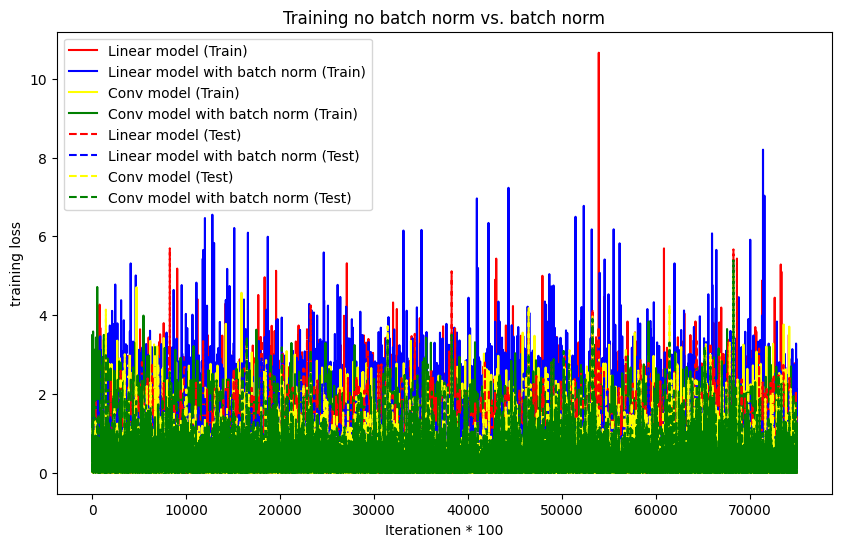

In [18]:
fig = plt.figure(figsize=(10,6))
plt.plot(x_vals, ll_t_iter_losses, label="Linear model (Train)", c="red")
plt.plot(x_vals, bn_ll_t_iter_losses, label="Linear model with batch norm (Train)", c="blue")
plt.plot(x_vals, conv_t_iter_losses, label="Conv model (Train)", c="yellow")
plt.plot(x_vals, bn_conv_t_iter_losses, label="Conv model with batch norm (Train)", c="green")

plt.plot(x_vals_test_data, ll_e_iter_losses, label="Linear model (Test)", linestyle = "dashed", c= "red")
plt.plot(x_vals_test_data, bn_ll_e_iter_losses, label="Linear model with batch norm (Test)", linestyle = "dashed", c="blue")
plt.plot(x_vals_test_data, conv_e_iter_losses, label="Conv model (Test)", linestyle = "dashed", c="yellow")
plt.plot(x_vals_test_data, bn_conv_e_iter_losses, label="Conv model with batch norm (Test)", linestyle = "dashed", c="green")

plt.xlabel('Iterationen * 100')
plt.ylabel('training loss')
plt.title("Training no batch norm vs. batch norm")
plt.legend()
plt.show()
plt.close()